In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing supermarket dataframe
df = pd.read_csv("C:\\Users\\USER\\Desktop\\Supermarket sales\\data.csv")
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
#looking for duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [7]:
#dropping all rows containing empty cells
df.dropna(inplace=True)

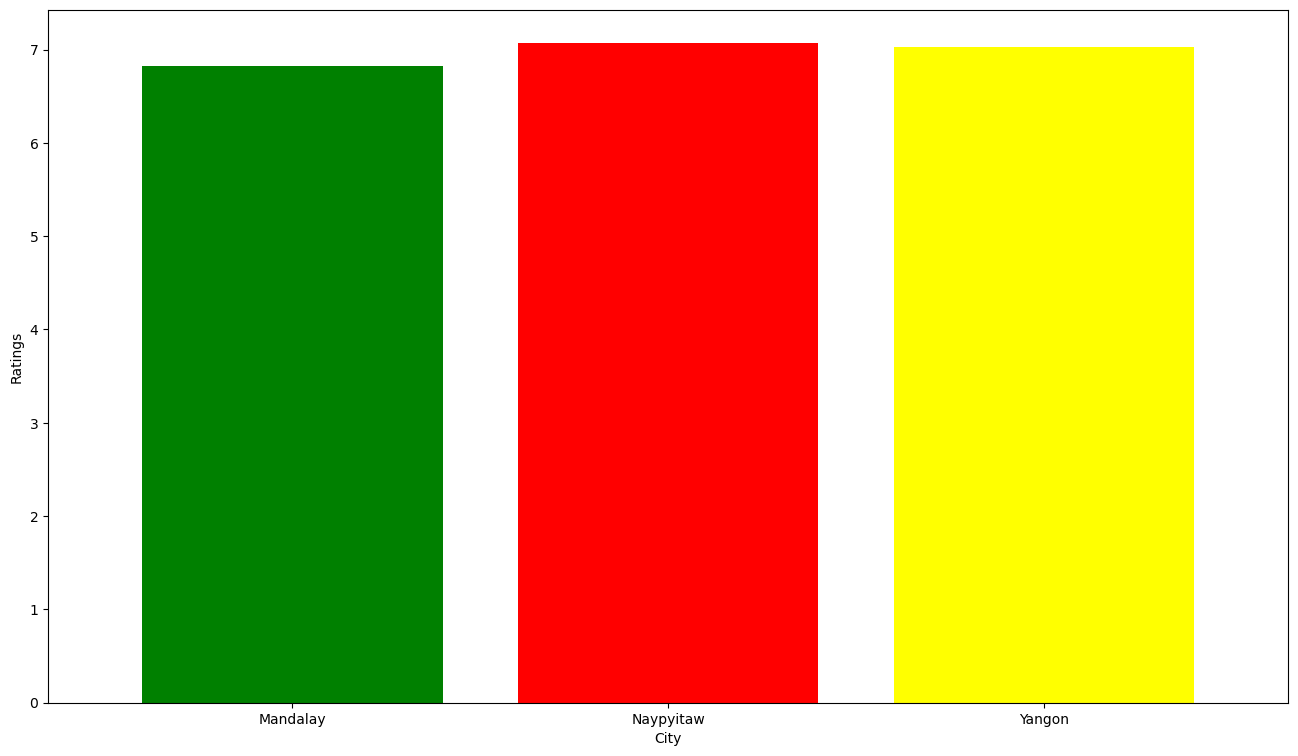

In [8]:
#uni variate data analysis
#ratings across the 3 branches on 10
color=['green','red','yellow']
a=df.groupby(by='City')['Rating'].mean()
plt.figure(figsize=(16,9))
a.plot(kind = 'bar', x = 'City', y = 'Rating', color=color, width = 0.8)
plt.ylabel('Ratings')
plt.xticks(rotation=0)
plt.show()

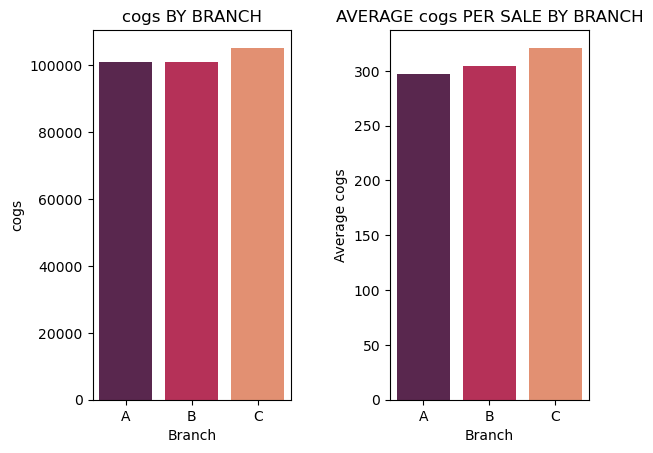

In [9]:
#gross income by branch
b=df.groupby('Branch')['cogs'].sum().reset_index()
plt.subplot(1,2,1)
sns.barplot(x='Branch', y='cogs', data=b, palette='rocket')
plt.title('cogs BY BRANCH')

#mean income per sale by branch
b=df.groupby('Branch')['cogs'].mean().reset_index()
plt.subplot(1,2,2)
sns.barplot(x='Branch', y='cogs', data=b, palette='rocket')
plt.title('AVERAGE cogs PER SALE BY BRANCH')
plt.ylabel('Average cogs')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

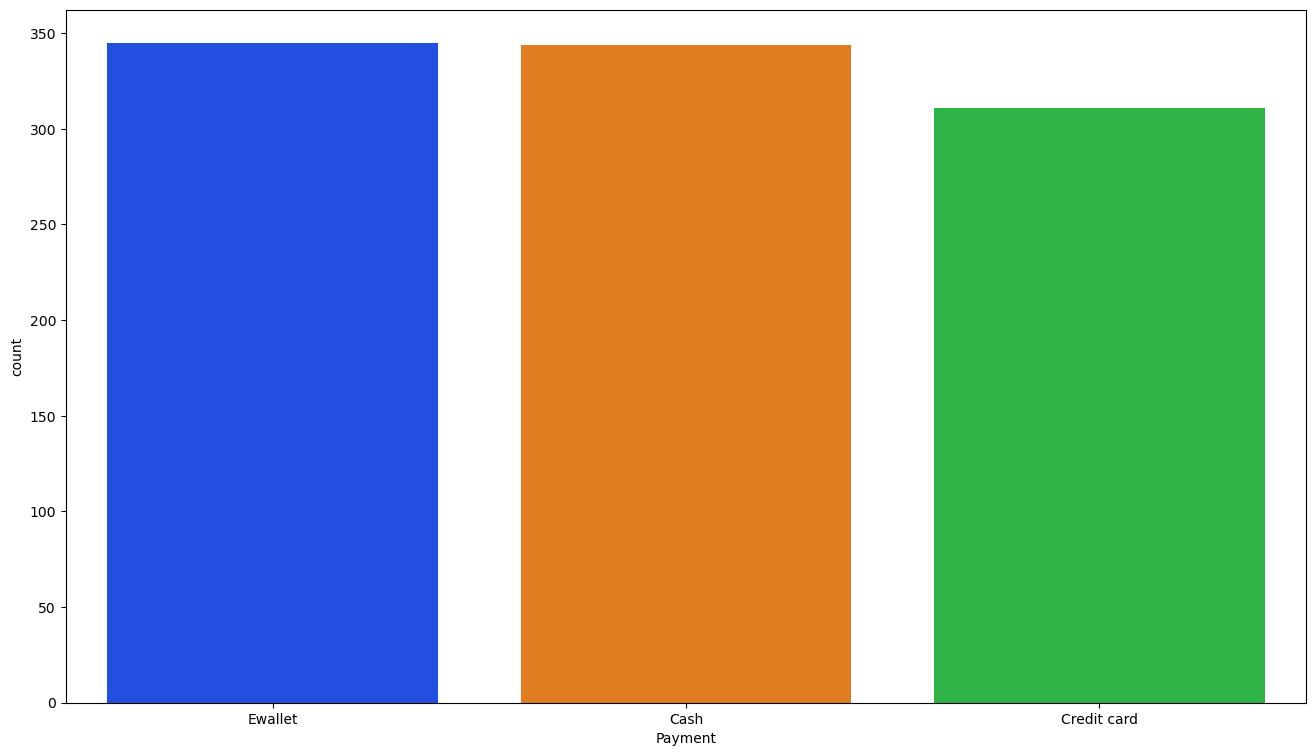

In [10]:
#most used payment methods
plt.figure(figsize=(16,9))
sns.countplot(x='Payment', data=df, palette='bright')
plt.show()

In [34]:
#converting dates to the right format
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


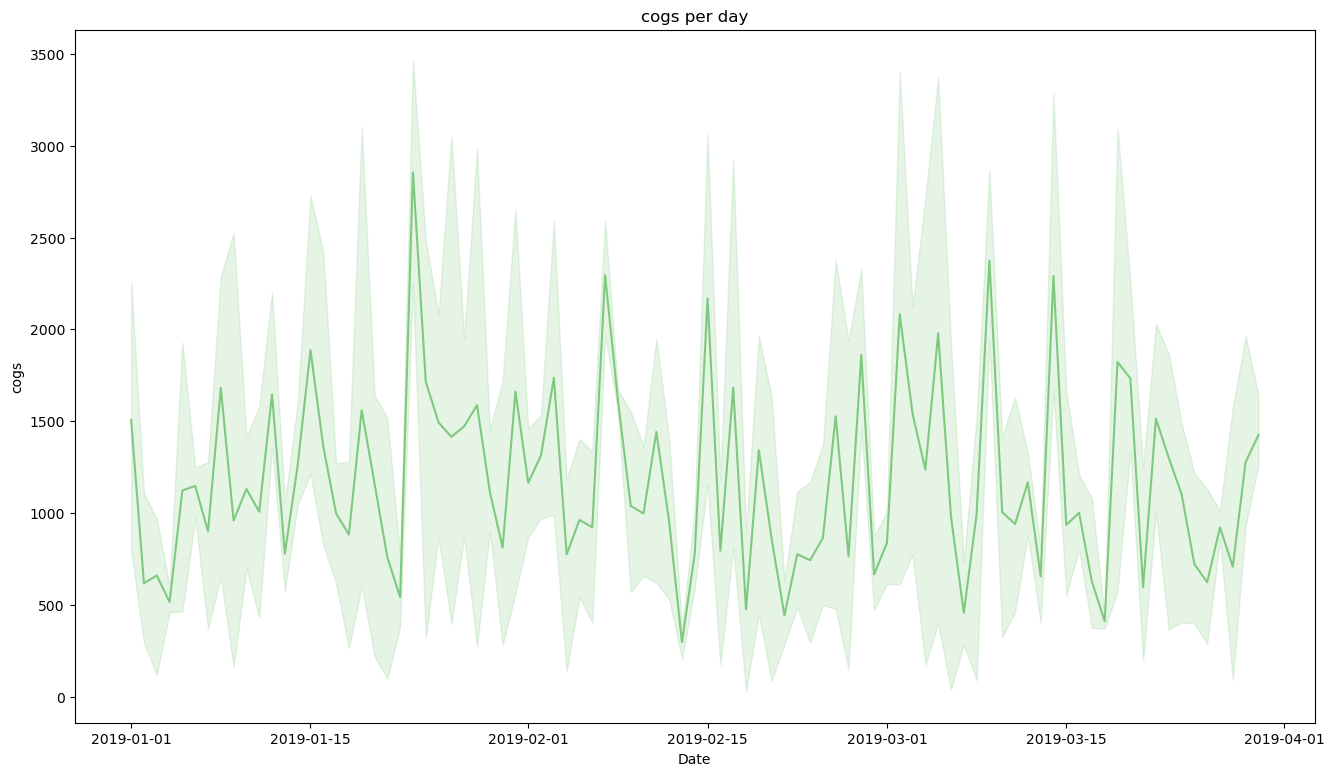

In [17]:
#cogs per day
c=df.groupby(['Branch', 'Date'])['cogs'].sum().reset_index()
plt.figure(figsize=(16,9))
sns.axes_style('darkgrid')
sns.set_palette('Accent')
sns.lineplot(x='Date', y='cogs', data=c)
plt.title('cogs per day')
plt.show()

<Figure size 1600x900 with 0 Axes>

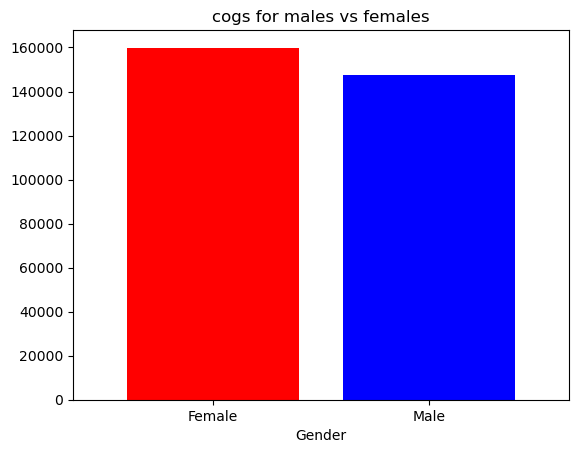

In [13]:
#Which Gender spends the most
d=df.groupby('Gender')['cogs'].sum().reset_index()
color=['red', 'blue']
plt.figure(figsize=(16,9))
d.plot(kind='bar', x='Gender', y='cogs', color=color, width=0.8)
plt.legend().remove()
plt.xticks(rotation=0)
plt.title('cogs for males vs females')
plt.show()

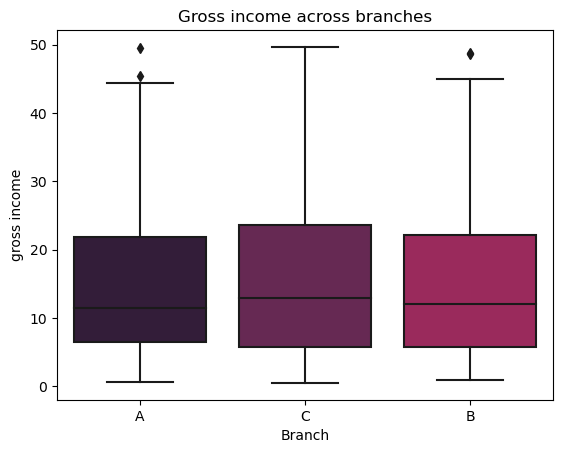

In [51]:
#which branch is most profitafble
sns.boxplot(x='Branch', y='gross income', data=df)
plt.title('Gross income across branches')
plt.show()

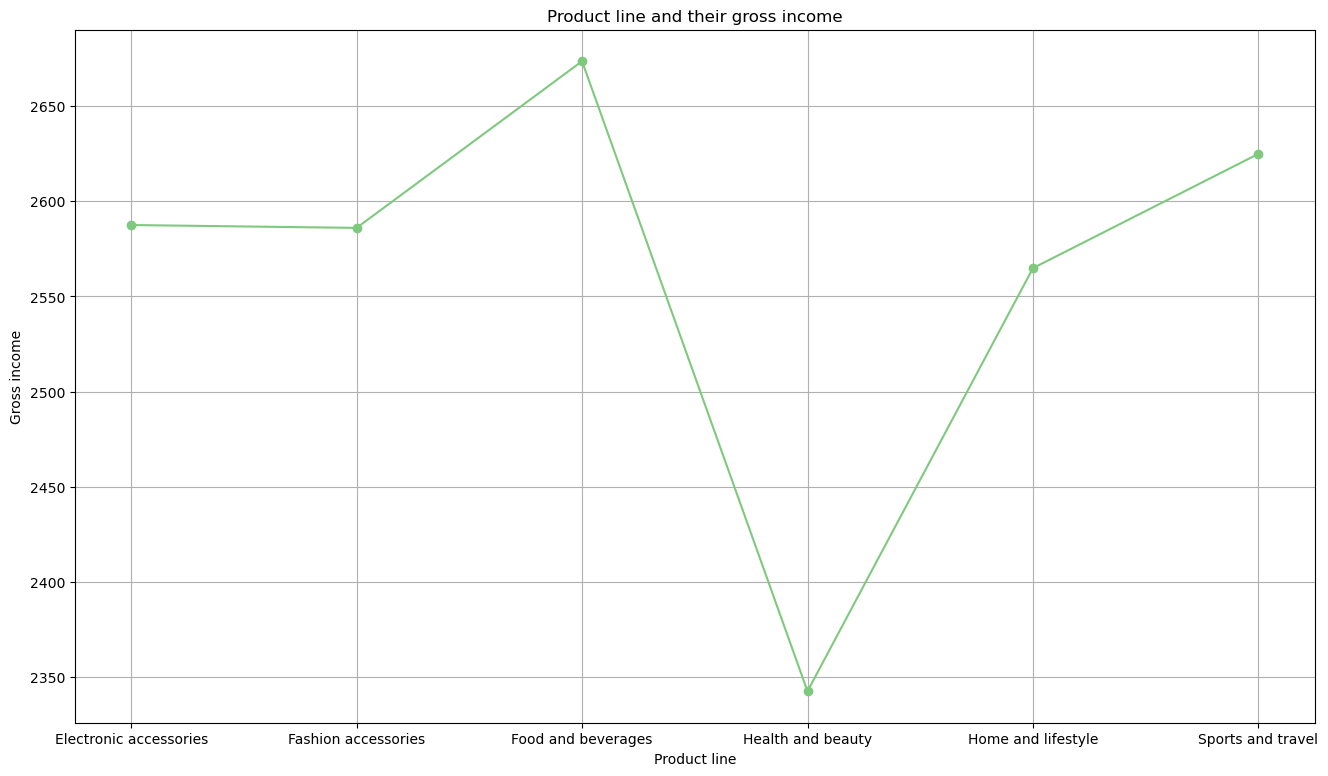

In [27]:
#which product line brings the highest gross income
e=df.groupby(by='Product line')['gross income'].sum()
plt.figure(figsize=(16,9))
e.plot(kind='line', x='Product line', y='gross income', marker='o')
plt.title('Product line and their gross income')
plt.ylabel('Gross income')
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

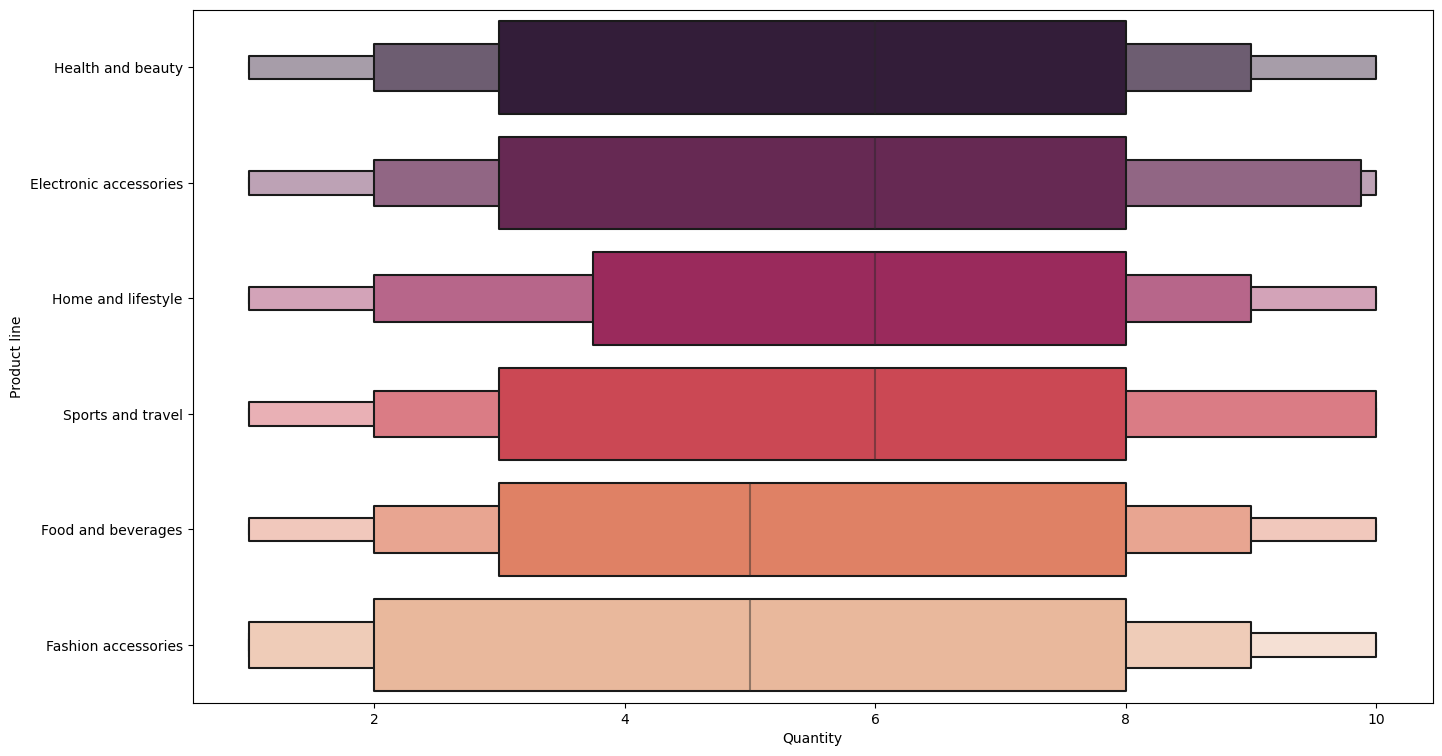

In [50]:
#Quantity sold by each product line
plt.figure(figsize=(16,9))
sns.boxenplot(y='Product line', x='Quantity', data=df)
plt.show

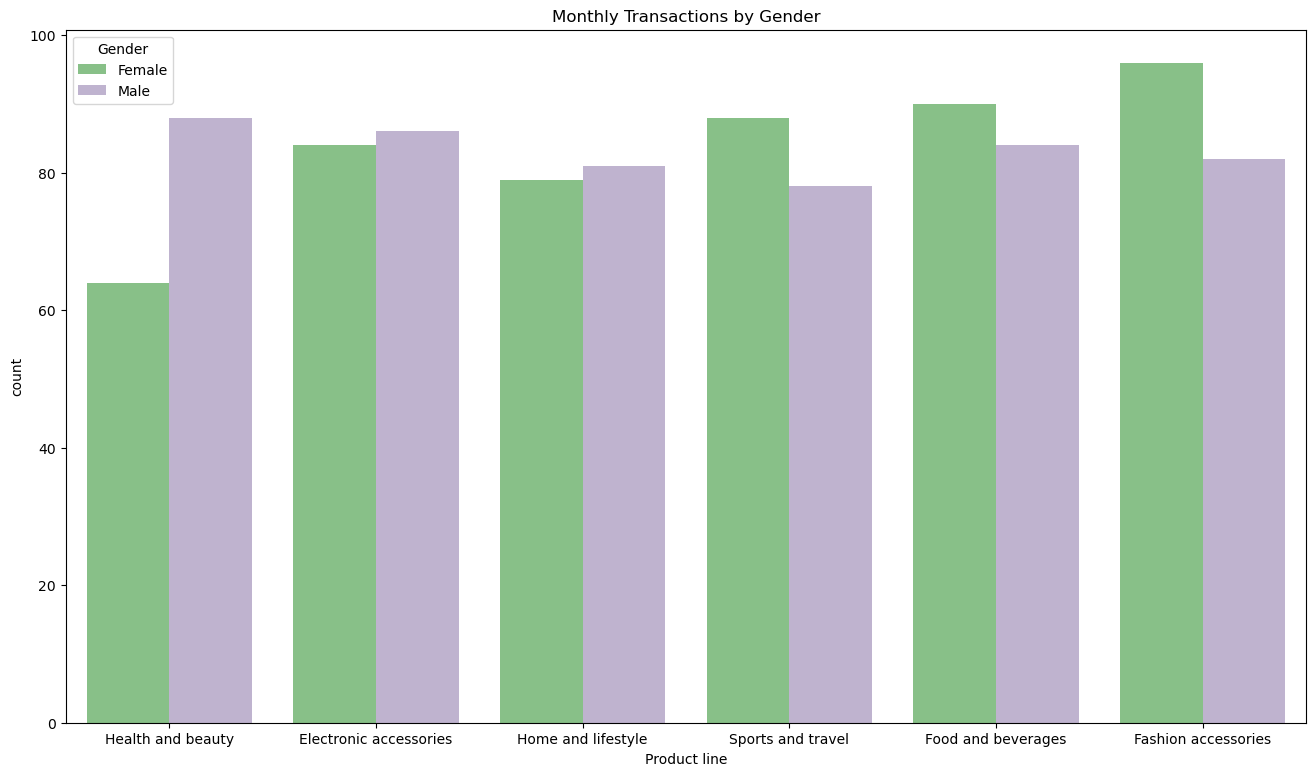

In [32]:
#Spending pattern of males and females
plt.figure(figsize=(16,9))
sns.countplot(x='Product line', data=df, hue=df.Gender)
plt.title('Monthly Transactions by Gender')
plt.show()

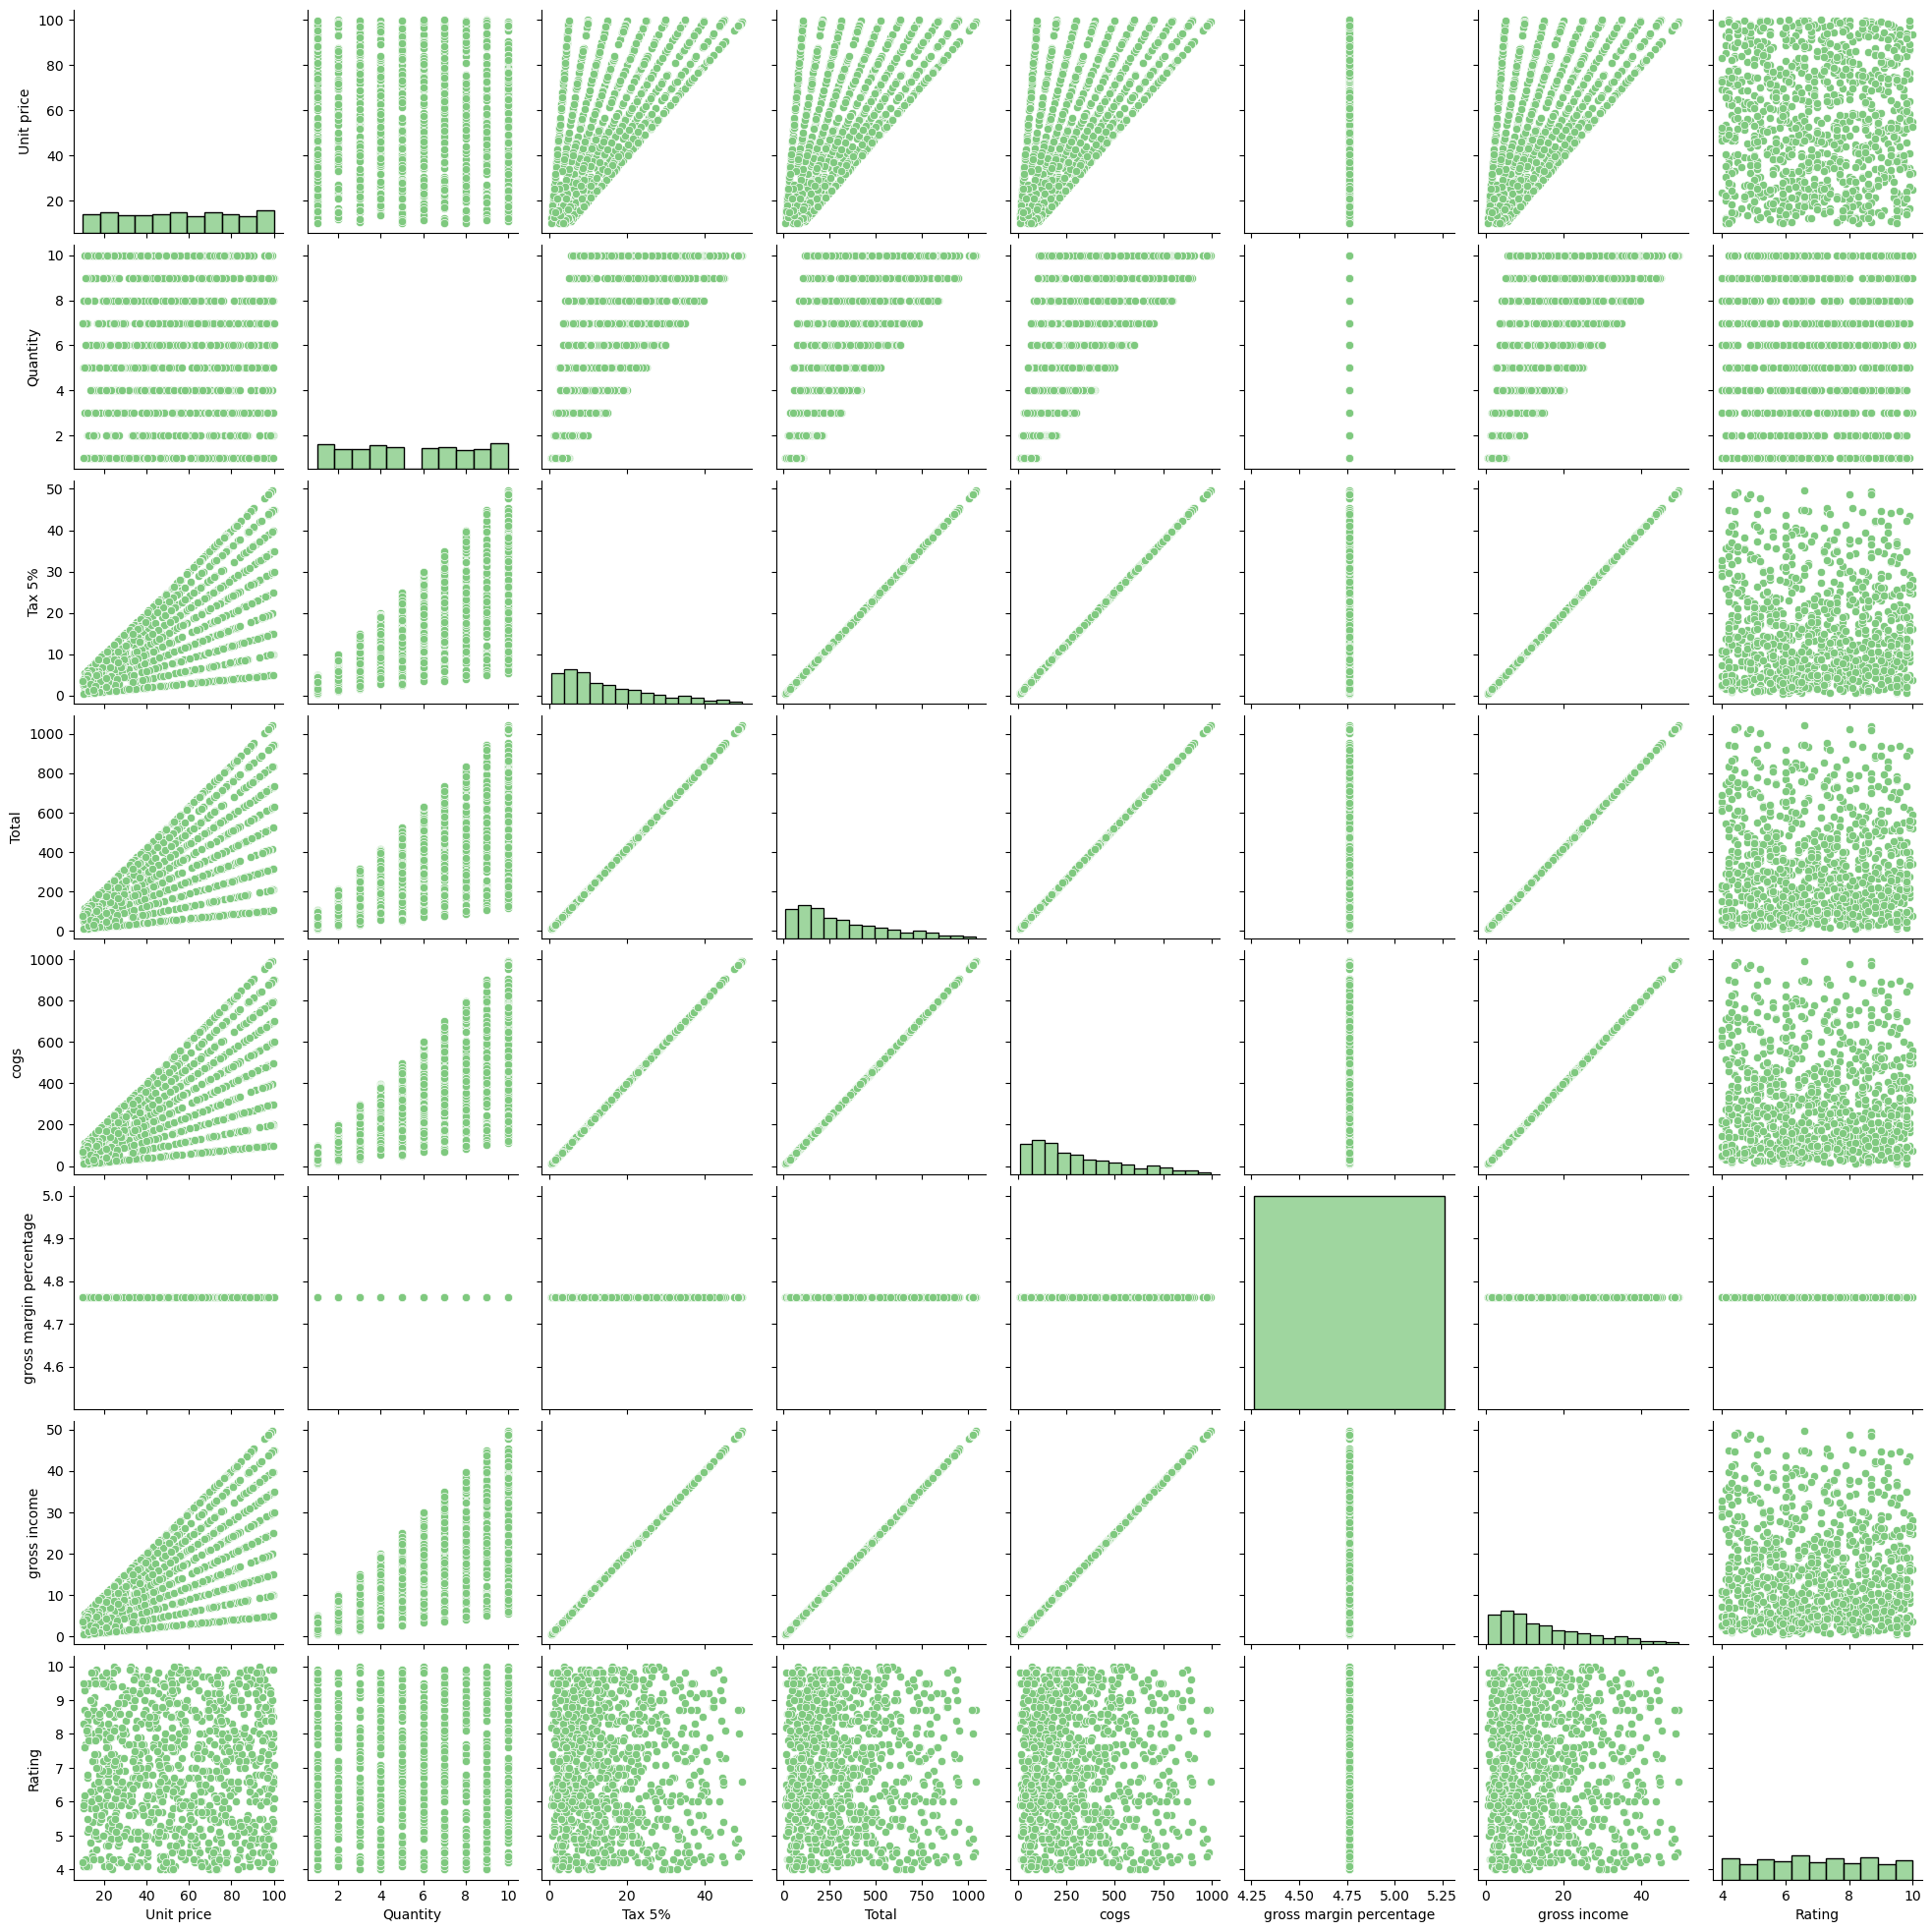

In [44]:
sns.pairplot(data=df)
sns.set_palette('rocket')
plt.show()

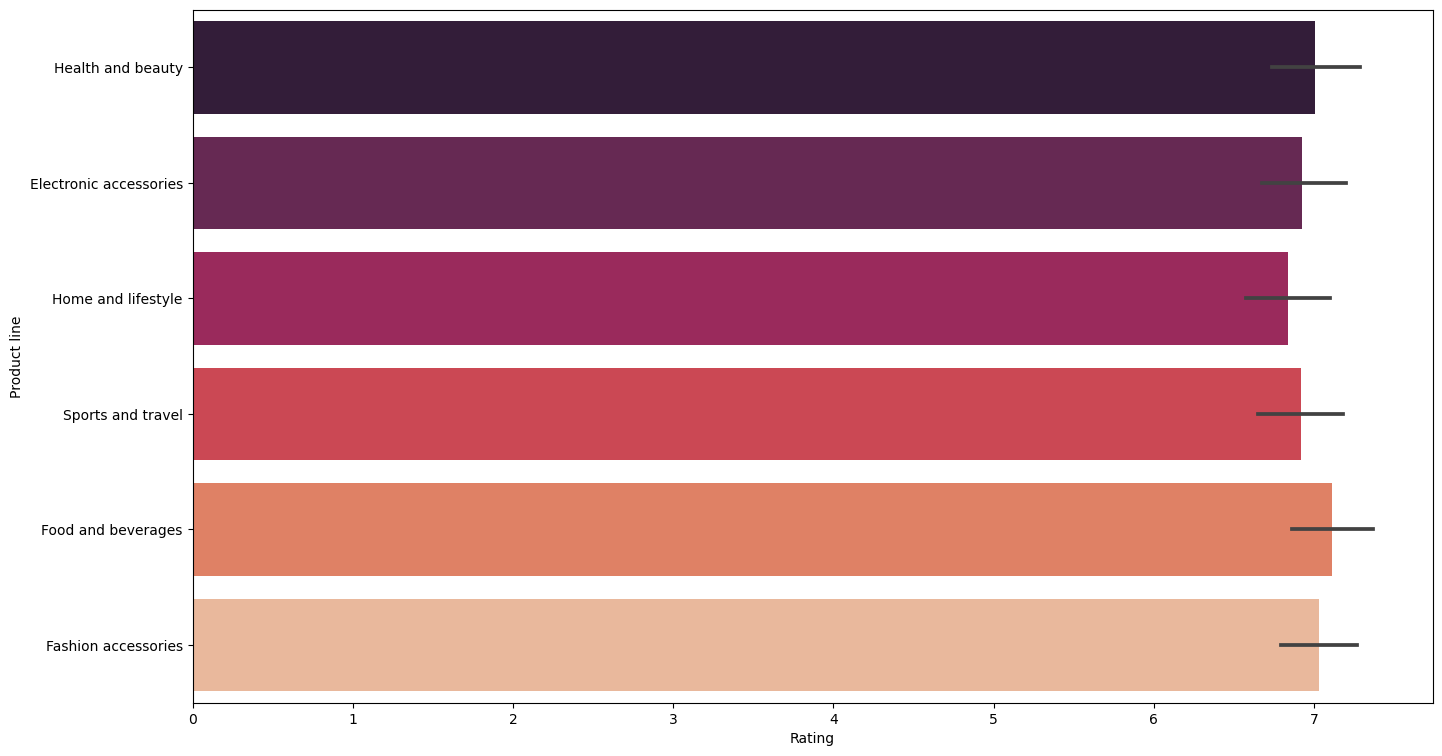

In [45]:
#ratings of the various product lines
plt.figure(figsize=(16,9))
sns.barplot(x=df['Rating'], y=df['Product line'])
plt.title('Product line ratings')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11016\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

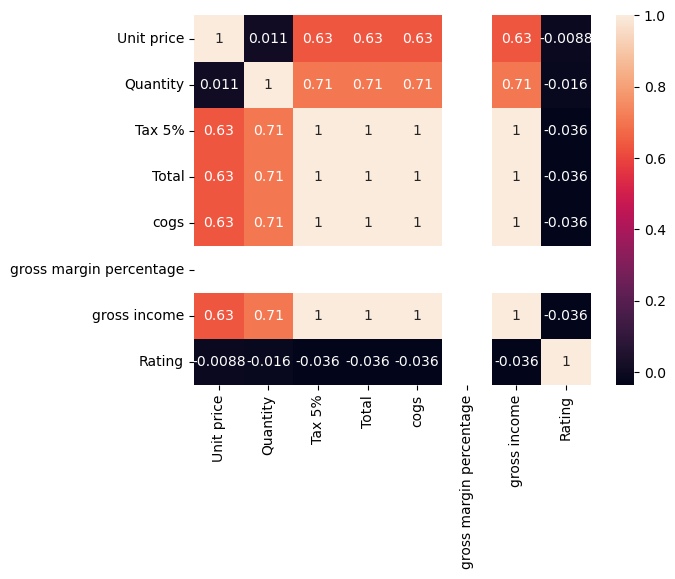

In [7]:
sns.heatmap(df.corr(), annot=True)

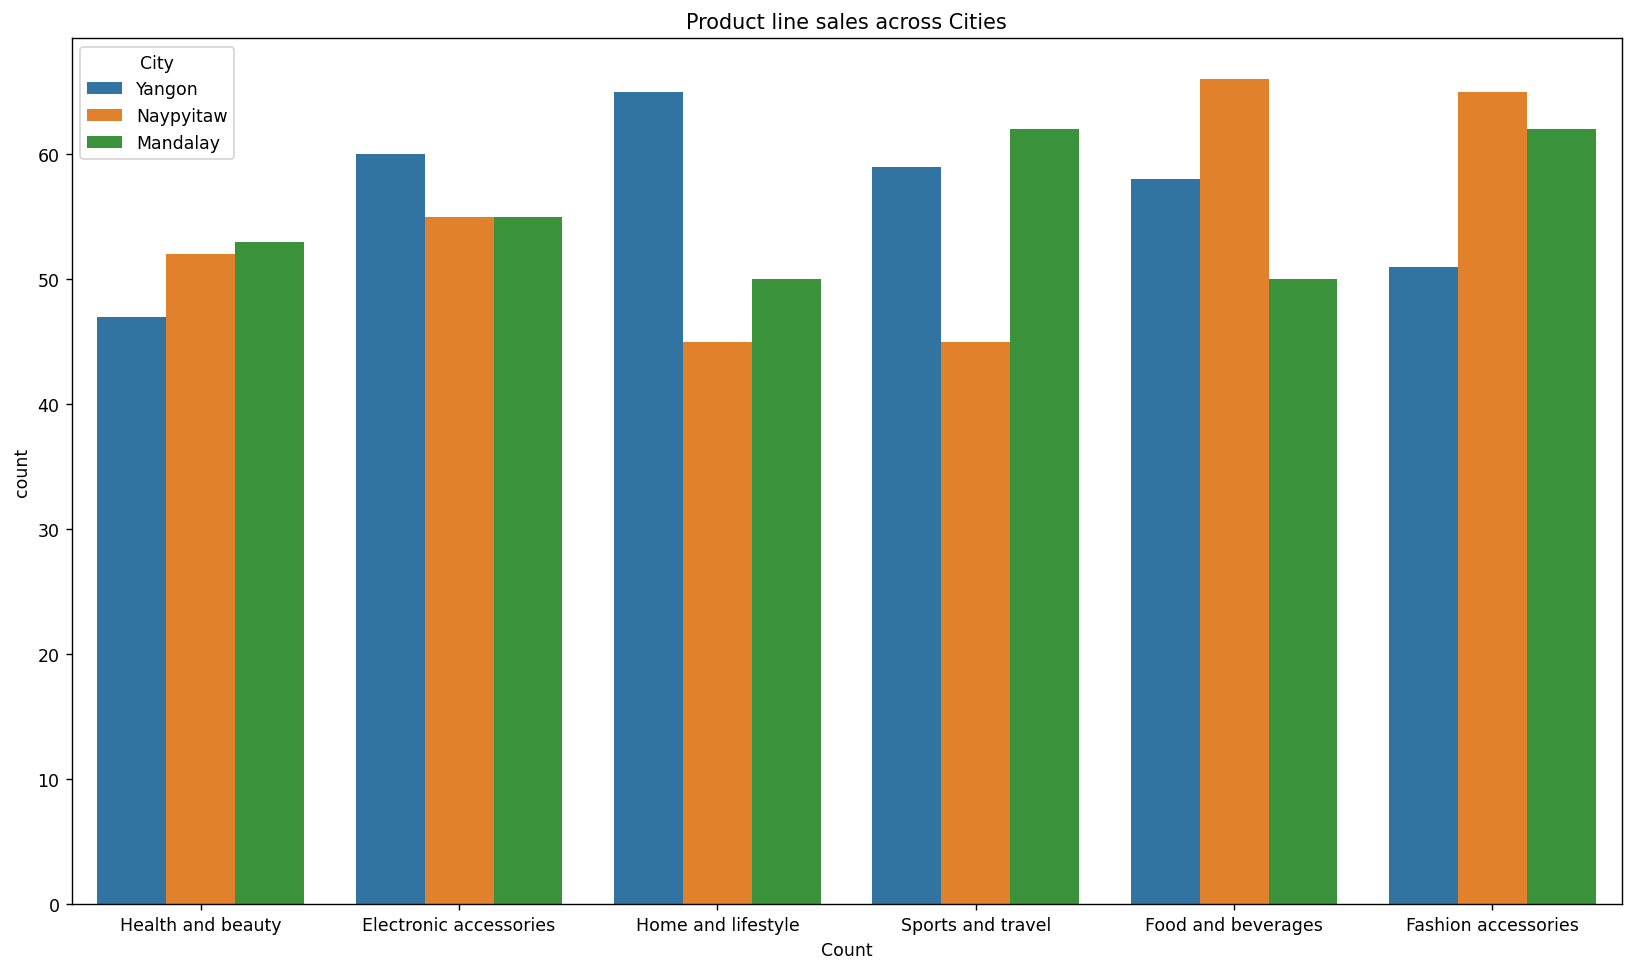

In [11]:
#product line sales across 3 branches
plt.figure(figsize=(16,9), dpi=125)
sns.countplot(x='Product line', hue='City', data=df)
plt.xlabel('Count')
plt.title('Product line sales across Cities')
plt.show()